In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
movies_database = pd.read_csv('../data/raw/movies.csv')
movies_database.shape

(19265, 16)

In [12]:
movies_database.head()

,id,year,title,description,genres,director,actors,writers,music,art,producer,imdb_id,tmdb_id,imdb_rating,tmdb_rating,available_now
0,1,2008,The Girl from Monaco,A brilliant and neurotic attorney goes to Mona...,"Comedy,Drama",Anne Fontaine,"Fabrice Luchini,Helene de Saint-Pere,Jeanne Ba...","Anne Fontaine,Benoît Graffin",Philippe Rombi,NaN,"Philippe Carcassonne,Bruno Pesary,Christine Ra...",tt1139800,15342.0,5.8,4.8,yes
1,2,2008,Every Jack has a Jill,Jack is encouraged to take the romantic Paris ...,"Comedy,Melodrama",Jennifer Devoldère,"Justin Lee Bartha,Billy Boyd,Maurice Bénichou,...",Jennifer Devoldère,NaN,"Hervé Gallet,Alix Deschamps","Bruno Chiche,Nicolas Duval Adassovsky,Maxime R...",tt1094668,32338.0,6.1,5.4,yes
2,3,2009,Dorian Gray,A vain London playboy offers his soul in excha...,"Thriller,Sci-Fi",Oliver Parker,"Colin Firth,Nathan Rosen,Caroline Goodall,John...","Toby Finlay,Oscar Wilde",Charlie Mole,"John Beard,Ruth Myers,Niamh Coulter","Barnaby Thompson,Paul Brett,Simon Fawcett",tt1235124,23488.0,6.3,5.9,yes
3,4,2008,How to Lose Friends & Alienate People,A British writer struggles to fit in at a high...,"Comedy,Drama",Robert B. Willow,"Simon Pegg,Jeff Bridges,Danny Huston,Jillian A...","Peter Straughan,Toby Young",David Arnold,"John Beard,Ray Chan,Anthony Gasparro","Elizabeth Karlsen,Laurie Borg,Stephen Woolley",tt0455538,13092.0,6.4,6.1,yes
4,5,2009,Cell 211,The story of two men on different sides of a p...,"Action,Thriller",Daniel Monzon,"Luis Tosar,Vicente Romero,Fernando Soto,Luis Z...","Daniel Monzon,F.P. Gandull,Jorge Guerricaechev...",Roque Baños,"Antón Laguna,Montse Sancho","Álvaro Augustín,Juan Gordon,Emma Lustres",tt1242422,33273.0,7.6,7.4,yes


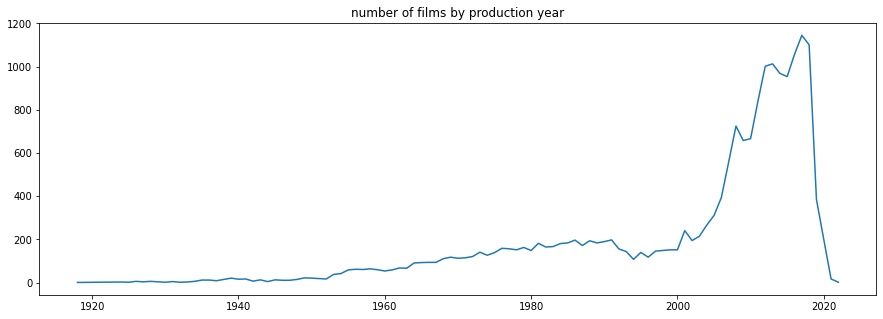

In [13]:
plt.figure(figsize=(15, 5))
movies_database.year.value_counts().sort_index().plot().set_title('number of films by production year');


# user_hist

In [3]:
user_hist_df = pd.read_csv('../data/raw/movies_dataset_10 months.csv')
user_hist_df.shape

(346408, 4)

In [4]:
most_popular = user_hist_df.movie_id.value_counts()[:10]

In [5]:
for film in most_popular.items():
    try:
        print('viwes:', film[1], 'movie_id:', film[0], 'film:', movies_database[movies_database['id'] == film[0]]['title'].values[0])
    except IndexError:
        pass

viwes: 6375 movie_id: 12304 film: Oggy and the Cockroaches: 5 Season
viwes: 4630 movie_id: 7735 film: Masha and the Bear
viwes: 4360 movie_id: 15285 film: The Good Doctor
viwes: 3465 movie_id: 17518 film: Zig et Sharko: 1 Season
viwes: 1718 movie_id: 19026 film: My Little Pony: Friendship Is Magic: 6 Season
viwes: 1451 movie_id: 18476 film: My Little Pony: Friendship Is Magic: 5 Season
viwes: 1261 movie_id: 16757 film: Barbie: Life in the Dreamhouse
viwes: 1175 movie_id: 15387 film: Westworld
viwes: 1172 movie_id: 13272 film: Vikings: 4 Season


In [6]:
most_popular_films = user_hist_df[user_hist_df['episode_id'] == 0].movie_id.value_counts()[:10]

In [7]:
for film in most_popular_films.items():
    try:
        print('viwes:', film[1], 
              'movie_id:', film[0], 
              'year:', movies_database[movies_database['id'] == film[0]]['year'].values[0],
              'genres', movies_database[movies_database['id'] == film[0]]['genres'].values[0],
              'film:', movies_database[movies_database['id'] == film[0]]['title'].values[0])
    except IndexError:
        pass

viwes: 1136 movie_id: 18943 year: 2019 genres Kids film: The Secret Life of Pets 2
viwes: 1119 movie_id: 18308 year: 2018 genres Action,Adventure,Sci-Fi film: Rampage
viwes: 864 movie_id: 7347 year: 2012 genres Kids film: Hotel Transylvania
viwes: 839 movie_id: 18311 year: 2018 genres Action,Adventure,Sci-Fi film: Ready Player One
viwes: 800 movie_id: 18520 year: 2019 genres Thriller,Sci-Fi,Drama film: Captive State
viwes: 785 movie_id: 18526 year: 2018 genres Comedy,Action,Thriller,Crime film: Ocean's Eight
viwes: 777 movie_id: 18080 year: 2018 genres Action,Thriller,Adventure,Sci-Fi,Fantasy film: Mortal Engines
viwes: 752 movie_id: 18652 year: 2018 genres Action,Thriller,Horror,Sci-Fi film: The Meg
viwes: 746 movie_id: 17239 year: 2018 genres Kids film: Asterix: The Secret of the Magic Potion
viwes: 734 movie_id: 17756 year: 2015 genres Kids film: Hotel Transylvania 2


видно что очень много детского контента в топе, и чаще смотрят сериалы

<AxesSubplot:>

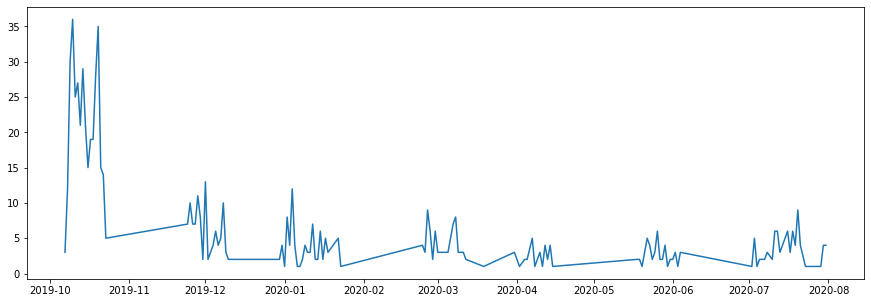

In [30]:
plt.figure(figsize=(15, 5))
pd.to_datetime(user_hist_df[user_hist_df['movie_id'] == 18080]['ts']).dt.date.value_counts().sort_index().plot()


<AxesSubplot:>

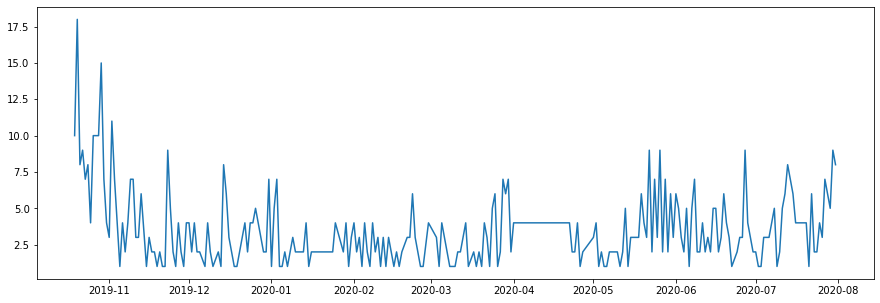

In [29]:
plt.figure(figsize=(15, 5))
pd.to_datetime(user_hist_df[user_hist_df['movie_id'] == 7347]['ts']).dt.date.value_counts().sort_index().plot()

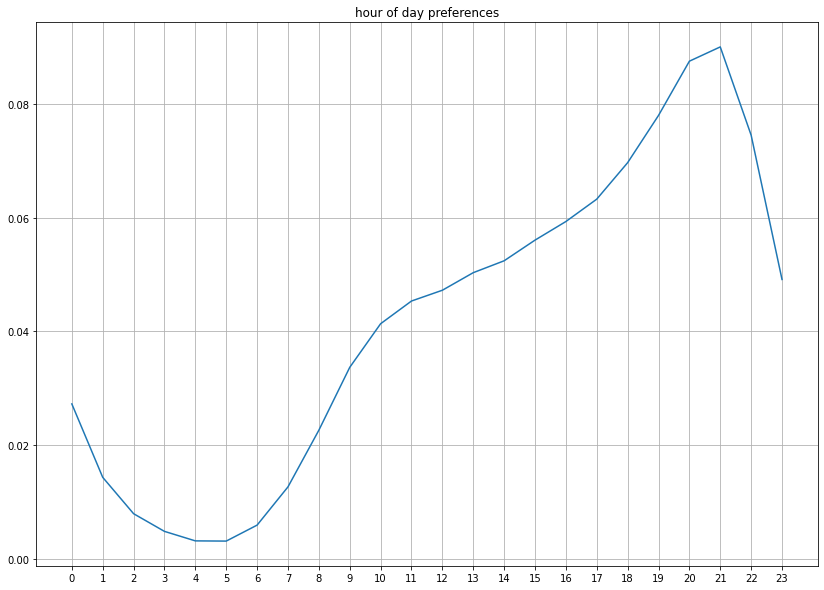

In [19]:
user_hist_df['hour'] = pd.to_datetime(user_hist_df['ts']).dt.hour
popular_hours = user_hist_df['hour'].value_counts().sort_index()/user_hist_df.shape[0]

ax = popular_hours.plot(figsize = (14,10), grid = True);
ax.set_xticks(range(24));
ax.set_title('hour of day preferences');

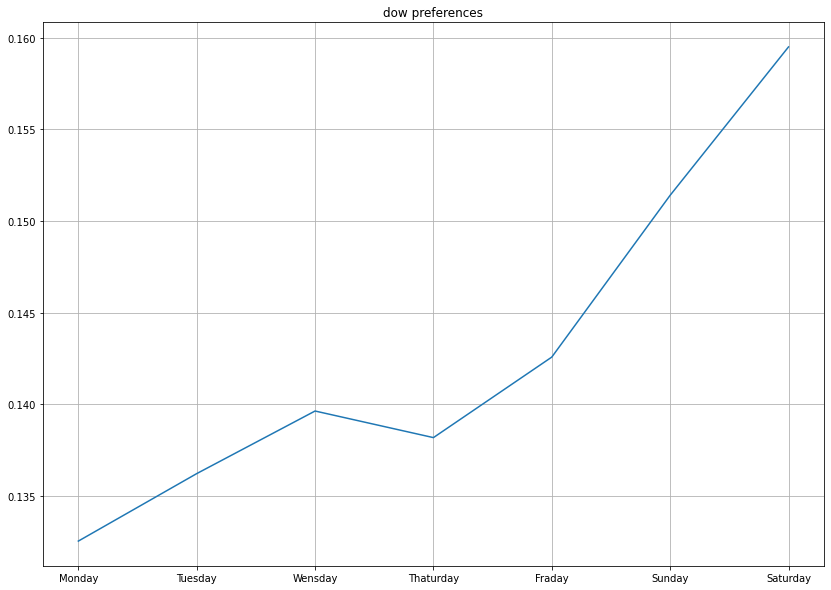

In [21]:
user_hist_df['dow'] = pd.to_datetime(user_hist_df['ts']).dt.weekday
popular_days = user_hist_df['dow'].value_counts().sort_index()/user_hist_df.shape[0]
days = pd.Series(['Monday', 'Tuesday', 'Wensday', 'Thaturday', 'Fraday', 'Sunday', 'Saturday'])

ax = popular_days.plot(figsize = (14,10), grid = True);
ax.set_xticks(range(7))
ax.set_xticklabels(days);
ax.set_title('dow preferences');

In [23]:
morning_popular = user_hist_df[user_hist_df['hour'].between(9, 12)].movie_id.value_counts()[:10]

for film in morning_popular.items():
    try:
        print('viwes:', film[1], 
              'movie_id:', film[0], 
              'film:', movies_database[movies_database['id'] == film[0]]['title'].values[0])
    except IndexError:
        pass

viwes: 1515 movie_id: 12304 film: Oggy and the Cockroaches: 5 Season
viwes: 1157 movie_id: 7735 film: Masha and the Bear
viwes: 853 movie_id: 17518 film: Zig et Sharko: 1 Season
viwes: 694 movie_id: 15285 film: The Good Doctor
viwes: 442 movie_id: 19026 film: My Little Pony: Friendship Is Magic: 6 Season
viwes: 357 movie_id: 18667 film: Bob the Builder
viwes: 328 movie_id: 18476 film: My Little Pony: Friendship Is Magic: 5 Season
viwes: 277 movie_id: 19645 film: 5th grade
viwes: 246 movie_id: 18089 film: Winx Club: 8 Season


In [24]:
night_popular = user_hist_df[user_hist_df['hour'].between(19, 22)].movie_id.value_counts()[:10]

for film in night_popular.items():
    try:
        print('viwes:', film[1], 
              'movie_id:', film[0], 
              'film:', movies_database[movies_database['id'] == film[0]]['title'].values[0])
    except IndexError:
        pass

viwes: 1638 movie_id: 12304 film: Oggy and the Cockroaches: 5 Season
viwes: 1321 movie_id: 15285 film: The Good Doctor
viwes: 1120 movie_id: 7735 film: Masha and the Bear
viwes: 745 movie_id: 17518 film: Zig et Sharko: 1 Season
viwes: 417 movie_id: 19026 film: My Little Pony: Friendship Is Magic: 6 Season
viwes: 409 movie_id: 15387 film: Westworld
viwes: 402 movie_id: 13272 film: Vikings: 4 Season
viwes: 395 movie_id: 18308 film: Rampage
viwes: 368 movie_id: 18476 film: My Little Pony: Friendship Is Magic: 5 Season


утром детское, вечером тоже детское но + немного взрослого

In [25]:
len(user_hist_df['user_id'].unique())

2055

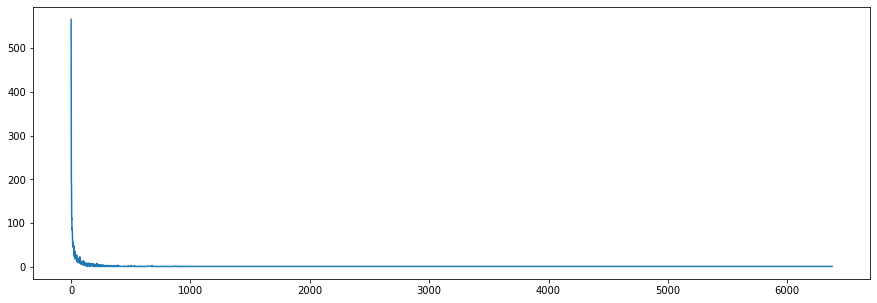

In [26]:
plt.figure(figsize=(15, 5))
user_hist_df['movie_id'].value_counts().value_counts().sort_index().plot();

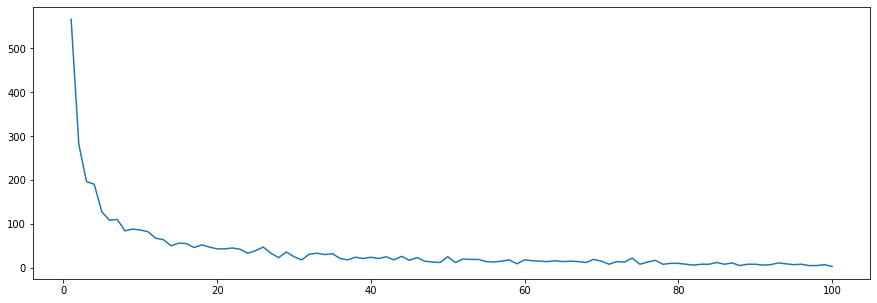

In [27]:
plt.figure(figsize=(15, 5))
item_popularity = user_hist_df['movie_id'].value_counts().value_counts().sort_index()
item_popularity[:100].plot();

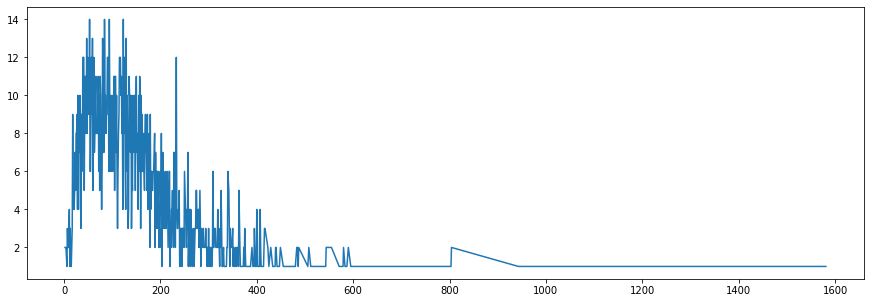

In [28]:
plt.figure(figsize=(15, 5))
user_hist_df['user_id'].value_counts().value_counts().sort_index().plot();

я бы выделил 3 группы пользователей

- те кто сделал визитов от 0 до 50
- от 50 до 200
- от 200 до 400 
- 400 и больше

In [29]:
user_actions = user_hist_df['user_id'].value_counts() 

cold_users = user_actions[user_actions <= 50].index
loyal_users = user_actions[user_actions >= 200].index

print('cold users:', len(cold_users), 
      'loyal users:', len(loyal_users))

cold users: 289 loyal users: 599


In [30]:
cold_popular = user_hist_df[user_hist_df['user_id'].isin(cold_users)].movie_id.value_counts()[:10]

for film in cold_popular.items():
    try:
        print('viwes:', film[1], 
              'movie_id:', film[0], 
              'film:', movies_database[movies_database['id'] == film[0]]['title'].values[0])
    except IndexError:
        pass

viwes: 112 movie_id: 12304 film: Oggy and the Cockroaches: 5 Season
viwes: 95 movie_id: 18308 film: Rampage
viwes: 79 movie_id: 18943 film: The Secret Life of Pets 2
viwes: 65 movie_id: 7347 film: Hotel Transylvania
viwes: 64 movie_id: 18080 film: Mortal Engines
viwes: 56 movie_id: 18311 film: Ready Player One
viwes: 55 movie_id: 18213 film: Long Shot
viwes: 54 movie_id: 17756 film: Hotel Transylvania 2
viwes: 50 movie_id: 16724 film: Polly Pocket: 1 Season
viwes: 47 movie_id: 17517 film: Chernobyl


In [31]:
loyal_popular = user_hist_df[user_hist_df['user_id'].isin(loyal_users)].movie_id.value_counts()[:10]

for film in loyal_popular.items():
    try:
        print('viwes:', film[1], 
              'movie_id:', film[0], 
              'film:', movies_database[movies_database['id'] == film[0]]['title'].values[0])
    except IndexError:
        pass

viwes: 3760 movie_id: 12304 film: Oggy and the Cockroaches: 5 Season
viwes: 2984 movie_id: 7735 film: Masha and the Bear
viwes: 2718 movie_id: 15285 film: The Good Doctor
viwes: 2515 movie_id: 17518 film: Zig et Sharko: 1 Season
viwes: 975 movie_id: 19026 film: My Little Pony: Friendship Is Magic: 6 Season
viwes: 937 movie_id: 18476 film: My Little Pony: Friendship Is Magic: 5 Season
viwes: 837 movie_id: 16757 film: Barbie: Life in the Dreamhouse
viwes: 835 movie_id: 15387 film: Westworld
viwes: 809 movie_id: 15389 film: Boardwalk Empire


те пользователи которые чаще смотрят они смотрят мультфильмы, пользователи у которых не много просмотров смотрят не детские сериалы 

получается если есть ребенок, то там куча просмотров мультфильмов

In [32]:
user_hist_df['user_id'].value_counts()[:200].sum()/user_hist_df.shape[0]

0.2820748943442415

5% топ пользователей генерят 28% просмотров

In [104]:
user_hist_df['movie_id'].value_counts()[:242].sum()/user_hist_df.shape[0]

0.40041223066441883

на 5% movie_id приходится 40% просмотров

In [105]:
user_hist_df['ts'].min()

'2019-10-01 00:01:31'

In [106]:
user_hist_df['ts'].max()

'2020-07-31 23:57:57'

In [4]:
user_hist_df_dd = user_hist_df[['user_id', 'movie_id']].drop_duplicates()

In [5]:
user_hist_df_dd = pd.merge(user_hist_df_dd, movies_database[['id', 'year', 'imdb_rating', 'tmdb_rating']], how = 'left', 
                        left_on = 'movie_id', 
                        right_on = 'id')

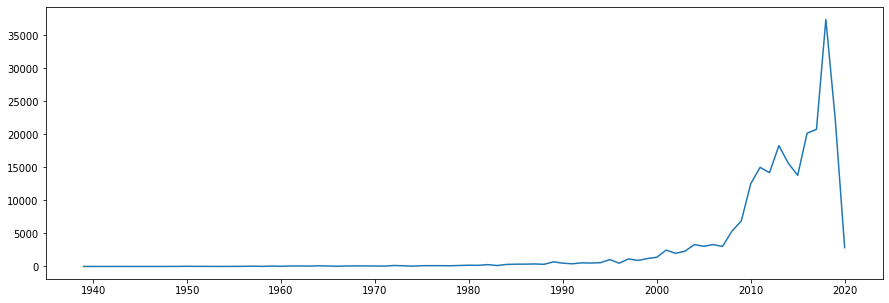

In [12]:
plt.figure(figsize=(15, 5))

user_hist_df_dd['year'].value_counts().sort_index().plot();

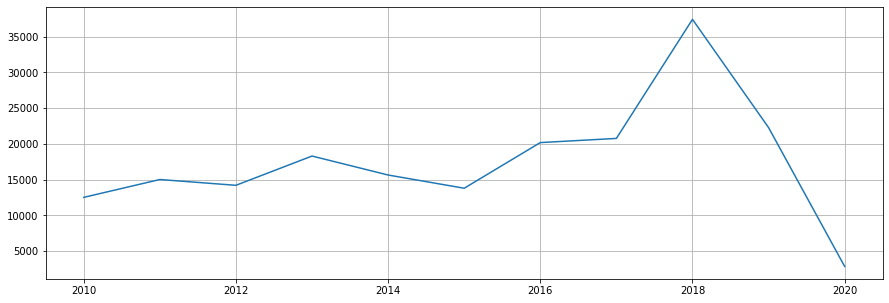

In [14]:
plt.figure(figsize=(15, 5))
user_hist_df_dd[user_hist_df_dd['year'] >= 2010]['year'].value_counts().sort_index().plot(grid=True);


In [145]:
repeat_users = user_hist_df[user_hist_df['episode_id'] == 0].groupby(['user_id', 'movie_id'])['movie_id'].count()


In [153]:
repeat_users[repeat_users>=2]


Series([], Name: movie_id, dtype: int64)

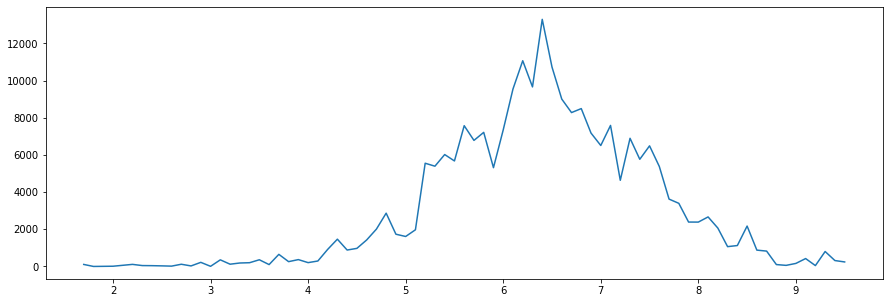

In [16]:
plt.figure(figsize=(15, 5))

user_hist_df_dd['imdb_rating'].value_counts().sort_index().plot();

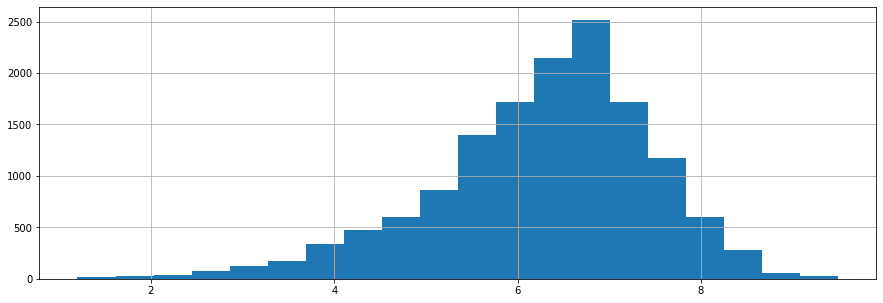

In [20]:
plt.figure(figsize=(15, 5))
movies_database['imdb_rating'].hist(bins = 20);

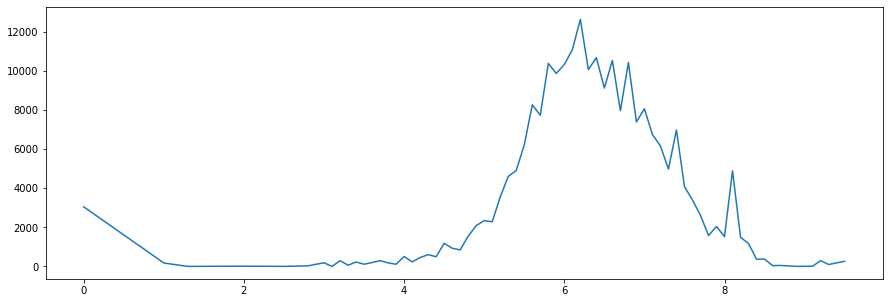

In [17]:
plt.figure(figsize=(15, 5))

user_hist_df_dd['tmdb_rating'].value_counts().sort_index().plot();

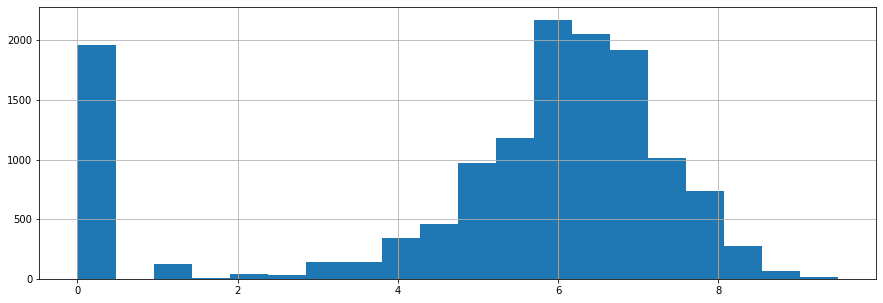

In [7]:
plt.figure(figsize=(15, 5))
movies_database['tmdb_rating'].hist(bins = 20);

никто не пересматривае старое у них на сервисе

# submit

In [24]:
sbmt = pd.read_csv('../data/raw/submission.csv')
print(sbmt.shape)
sbmt.head()

(1695, 2)


,user_id,movie_id
0,16975709365084587137,0 0 0 0 0
1,10225505309438393880,0 0 0 0 0
2,337894458057354820,0 0 0 0 0
3,16389753737490268206,0 0 0 0 0
4,12377183607123393787,0 0 0 0 0


In [158]:
users_with_hist = set(user_hist_df['user_id'].unique())
sbm_users = set(sbmt['user_id'].unique())

print('all users:', len(users_with_hist), 
      'sbm users:', len(sbm_users), 
      'intersec:', len(users_with_hist.intersection(sbm_users)))

all users: 2055 sbm users: 1695 intersec: 1695


ооо, без холодных пользователей. это немного облегчает задачу, но с холодными вообще прикольней

6. распределение транзакций в день
7. распределение сколько фильмов в день смотрят пользователи

# just top 5 

In [163]:
most_popular.index[:5]

Int64Index([12304, 7735, 15285, 17518, 19026], dtype='int64')

# random 5 from 100 most popular

In [169]:
most_popular_100.index

Int64Index([12304,  7735, 15285, 17518, 19026, 18476, 17241, 16757, 15387,
            13272, 18943, 18308, 18667, 15389, 18026, 18089, 11561, 16724,
            12212, 15388, 19628,  7347, 17517, 19645, 15341, 18311, 18520,
            13563, 18526, 18080, 17539, 17852, 18652, 15289, 17239, 17756,
            18576, 12561, 18484, 15368, 16676, 17014, 18883, 18213, 17295,
            19287, 17292, 18153, 15295, 15286, 18162, 18165, 18078, 16975,
            18373, 19785, 18620, 18413, 17966, 16996, 17816, 15393, 19006,
            13109, 13189, 19647, 18607, 15392, 11552, 18406, 13812, 17234,
            18968, 16830,  8973, 18362, 13671, 17291, 15541, 17364,  7349,
            10584, 18268, 18746, 18085, 18251, 17757, 13352, 10475, 17290,
            16601, 19207, 17289, 13378, 15489, 17288, 17677,  4624, 15356,
            14435],
           dtype='int64')

In [174]:
import random

most_popular_100 = list(user_hist_df.movie_id.value_counts()[:100].index)

preds = dict()

for user in sbm_users:
    preds[user] = random.sample(most_popular_100, 5)

In [177]:
import pickle

with open('../data/processed/random_5_from_top100.pickle', 'wb') as f:
    pickle.dump(preds, f)

валидацию настроить

1. add movies features to lightfm (year, genre, ratings, sweet.tv rating)
3. RNN
4. user-2-user
5. hybrid
6. researech (movie lens)